In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.drop(columns = ['PassengerId','Name','Ticket','Cabin','Embarked'], axis = 1, inplace = True)

In [5]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [7]:
titanic.isnull().sum()/891*100

Survived     0.00000
Pclass       0.00000
Sex          0.00000
Age         19.86532
SibSp        0.00000
Parch        0.00000
Fare         0.00000
dtype: float64

In [8]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
a = np.mean(titanic['Age'])
a

29.69911764705882

In [10]:
titanic['Age'].fillna(a,inplace = True)

In [11]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [12]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
import seaborn as sns

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


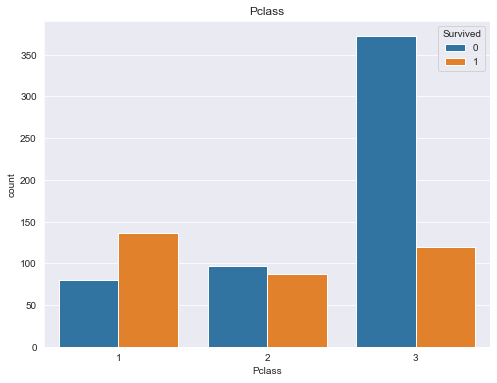

In [14]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("Pclass",data=titanic,hue="Survived")
plt.title("Pclass")
plt.show()

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


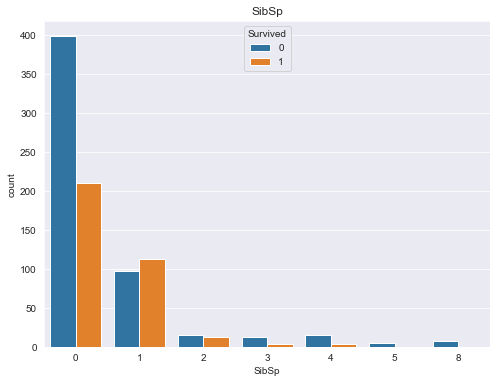

In [15]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("SibSp",data=titanic,hue="Survived")
plt.title("SibSp")
plt.show()

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


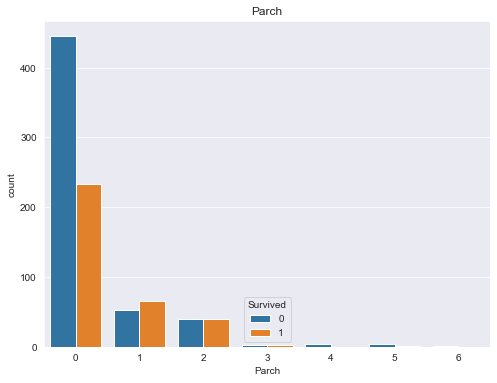

In [16]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("Parch",data=titanic,hue="Survived")
plt.title("Parch")
plt.show()

<AxesSubplot:>

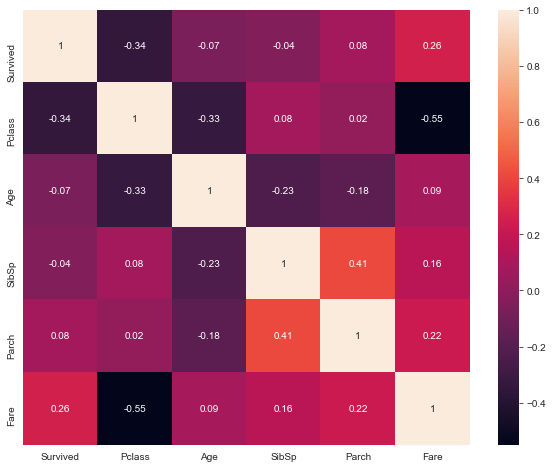

In [17]:
plt.figure(figsize = (10, 8))
sns.heatmap(data = titanic.corr().round(2),annot = True)

In [18]:
print(titanic[titanic["Survived"]==0].shape)
print(titanic[titanic["Survived"]==1].shape)

(549, 7)
(342, 7)


In [19]:
titanic['Sex'] = np.where(titanic['Sex'] == 'male',0,1 )

In [20]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


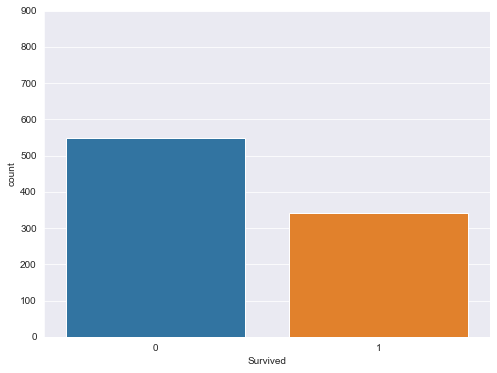

In [21]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(x = 'Survived',data = titanic)
plt.yticks(range(0,1000,100))
plt.show()

In [22]:
X = titanic[titanic.columns.difference( ['Survived'] )]
Y = titanic['Survived']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

In [24]:
y_test.shape

(179,)

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#DecisionTrees using GridsearchCV
param_grid = {'max_depth': [3,4,5,6,7,8,9,10],
              'max_leaf_nodes': [5,6,7,8,9,10,11,12],
              'max_features':[3,4,5]
}
model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1_weighted')
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [3, 4, 5],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='f1_weighted')

In [32]:
model.best_params_

{'max_depth': 6, 'max_features': 4, 'max_leaf_nodes': 9}

In [41]:
dec_tree = DecisionTreeClassifier(max_depth = 10,max_features = 6,max_leaf_nodes = 12)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=6, max_leaf_nodes=12)

In [42]:
y_pred = dec_tree.predict(X_test)

In [43]:
dec_tree.score(X_test,y_test)


0.8491620111731844

In [44]:
train_score = dec_tree.score(X_train,y_train)
train_score

0.8469101123595506

In [45]:
dectree_test_pred = pd.DataFrame({'actual':y_test,'predicted':y_pred})
dectree_test_pred.head()

,actual,predicted
693,0,0
670,1,1
333,0,0
886,0,0
110,0,0


In [46]:
tree_cm = metrics.confusion_matrix(dectree_test_pred.actual, dectree_test_pred.predicted,[1,0])
tree_cm

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([[61, 17],
       [10, 91]], dtype=int64)

In [54]:
import pickle
pickle.dump(dec_tree, open('decision_tree.pickle', 'wb'))

In [55]:
import pickle
Model = pickle.load(open('decision_tree.pickle', 'rb'))

In [60]:
X_train.dtypes

Age       float64
Fare      float64
Parch       int64
Pclass      int64
Sex         int32
SibSp       int64
dtype: object

In [59]:
Model.predict([['29.69','7.22','0','2','0','0']])

array([0], dtype=int64)

In [61]:
X_train

,Age,Fare,Parch,Pclass,Sex,SibSp
288,42.000000,13.0000,0,2,0,0
568,29.699118,7.2292,0,3,0,0
246,25.000000,7.7750,0,3,1,0
115,21.000000,7.9250,0,3,0,0
411,29.699118,6.8583,0,3,0,0
...,...,...,...,...,...,...
358,29.699118,7.8792,0,3,1,0
683,14.000000,46.9000,2,3,0,5
112,22.000000,8.0500,0,3,0,0
884,25.000000,7.0500,0,3,0,0
